## **Presented By:** 
### - Azzouzi Ousssama Abderraouf

# 1- Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



# 2- loading datasets

In [21]:
df = pd.read_csv('simulation_data.csv')
df.head()

,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006093,0.000000,0.000000,0.000000,0.002165,0.008258,13.100014
2,0.007670,0.006093,0.000000,0.000000,0.008835,0.016505,4.304472
3,0.008116,0.007670,0.006093,0.000000,0.016616,0.024732,2.108557
4,0.008146,0.008116,0.007670,0.006093,0.024783,0.032928,1.281677


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   e       100100 non-null  float64
 1   e_1     100100 non-null  float64
 2   e_2     100100 non-null  float64
 3   e_3     100100 non-null  float64
 4   theta   100100 non-null  float64
 5   ref     100100 non-null  float64
 6   torque  100100 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


# 3- Data Preprocessing

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
e,100100.0,0.004267,0.025791,-0.067720,-0.009798,0.003026,0.018746,0.081675
e_1,100100.0,0.004265,0.025779,-0.067720,-0.009774,0.003005,0.018728,0.081675
e_2,100100.0,0.004263,0.025767,-0.067720,-0.009755,0.002978,0.018705,0.081675
e_3,100100.0,0.004262,0.025755,-0.067720,-0.009739,0.002955,0.018683,0.081675
theta,100100.0,0.073086,0.602516,-1.553709,-0.239285,0.062637,0.428545,1.553642
ref,100100.0,0.077353,0.626288,-1.569970,-0.250289,0.066335,0.447800,1.569975
torque,100100.0,0.644110,4.319833,-10.187520,-1.688881,0.480683,2.986944,135.356195


In [24]:
# df.isnull().sum(), df.isna().sum(), df.shape, df.dtypes, df.columns, df.nunique()

print('null values in the dataset:', df.isnull().sum().sum())
print('na values in the dataset:', df.isna().sum().sum())
print('shape of the dataset:', df.shape)
print('data types of the dataset:', df.dtypes)
print('columns of the dataset:', df.columns)
# print('unique values in the dataset:', df.nunique())


null values in the dataset: 0
na values in the dataset: 0
shape of the dataset: (100100, 7)
data types of the dataset: e         float64
e_1       float64
e_2       float64
e_3       float64
theta     float64
ref       float64
torque    float64
dtype: object
columns of the dataset: Index(['e', 'e_1', 'e_2', 'e_3', 'theta', 'ref', 'torque'], dtype='object')


# 4- Feature Selection

In [25]:
# picking 20% of the data

# df = df[:int(len(df)*0.2)]
df.shape


(100100, 7)

In [26]:
# normalizing the data
scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# standardizing the data
scaler2 = StandardScaler()



target = df['torque']

# features to drop
redundant_features = ['torque', 'e_1', 'e_2', 'e_3']

features2 = df.drop(columns=redundant_features)
features = df.drop(columns='torque')



In [27]:
features.shape, target.shape, features2.shape

((100100, 6), (100100,), (100100, 3))

In [28]:
features = scaler.fit_transform(features)
features = scaler2.fit_transform(features)
features.shape

(100100, 6)

# 5- Data Splitting

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
X,x,Y,y = train_test_split(features2, target, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, x.shape, Y.shape, y.shape

((80080, 6),
 (20020, 6),
 (80080,),
 (20020,),
 (80080, 3),
 (20020, 3),
 (80080,),
 (20020,))

# 6- Model Selection, Training and Testing

In [78]:
import time
Start_Time = 0
Time = 0

time_Per= pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'time': [0, 0, 0, 0]
})

time_noPer = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'time': [0, 0, 0, 0]
})


### **6-A- LinearRegression**

In [30]:
# building linear regression model
from sklearn.linear_model import LinearRegression

Start_Time = time.time()
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
Time = time.time() - Start_Time
time_Per['time'][0] = Time

Start_Time = time.time()
model_lr2 = LinearRegression()
model_lr2.fit(X, Y)
Time = time.time() - Start_Time
time_noPer['time'][0] = Time


LinearRegression()

In [31]:
y_pred = model_lr.predict(X_test)
score = model_lr.score(X_test, y_test)

y_pred2 = model_lr2.predict(x)
score2 = model_lr2.score(x, y)


print('score:', score)
print('mean squared error:', mean_squared_error(y_test, y_pred))
print('mean absolute error:', mean_absolute_error(y_test, y_pred))

print('Second model')
print('score:', score2)
print('mean squared error:', mean_squared_error(y, y_pred2))
print('mean absolute error:', mean_absolute_error(y, y_pred2))

score: 0.9999999999993945
mean squared error: 1.0395319363719676e-11
mean absolute error: 9.312320193940693e-07
Second model
score: 0.8306890964872775
mean squared error: 2.9067460850019566
mean absolute error: 0.7534398363697337


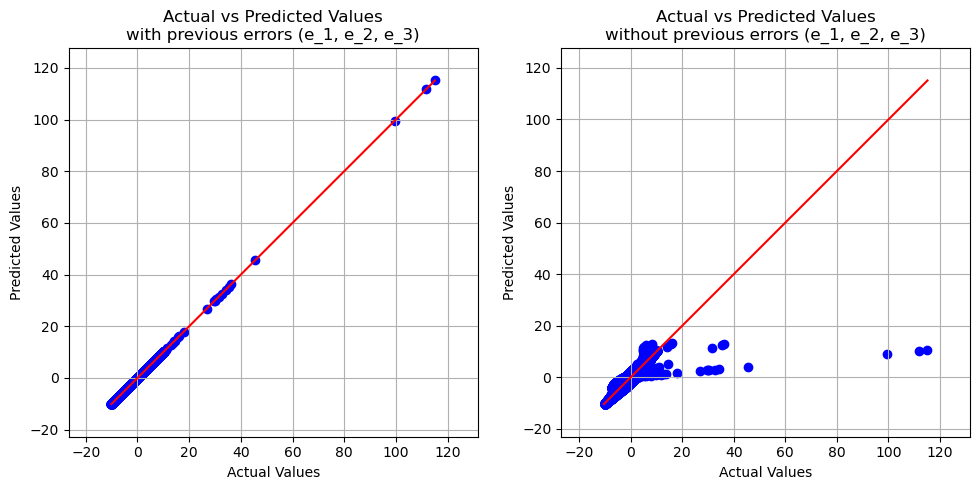

In [71]:
def plot_predictions(y_test, y_pred, y, y_pred2):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    # First plot
    axs[0].scatter(y_test, y_pred, color='blue')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    axs[0].plot([p1, p2], [p1, p2], 'red')
    axs[0].grid(True)
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')
    axs[0].set_title('Actual vs Predicted Values\nwith previous errors (e_1, e_2, e_3)')
    axs[0].axis('equal')

    # Second plot
    axs[1].scatter(y, y_pred2, color='blue')
    p1 = max(max(y_pred2), max(y))
    p2 = min(min(y_pred2), min(y))
    axs[1].plot([p1, p2], [p1, p2], 'red')
    axs[1].grid(True)
    axs[1].set_xlabel('Actual Values')
    axs[1].set_ylabel('Predicted Values')
    axs[1].set_title('Actual vs Predicted Values\nwithout previous errors (e_1, e_2, e_3)')
    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

# Calling the function with the data
plot_predictions(y_test, y_pred, y, y_pred2)

### **6-B- RandomForestRegressor**

In [33]:
# building random forest model
from sklearn.ensemble import RandomForestRegressor

Start_Time = time.time()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
Time = time.time() - Start_Time
time_Per['time'][1] = Time

Start_Time = time.time()
model_rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf2.fit(X, Y)
Time = time.time() - Start_Time
time_noPer['time'][1] = Time


RandomForestRegressor(random_state=42)

In [34]:
y_pred_rf = model_rf.predict(X_test)
score_rf = model_rf.score(X_test, y_test)

y_pred_rf2 = model_rf2.predict(x)
score_rf2 = model_rf2.score(x, y)

print('score:', score_rf)
print('mean squared error:', mean_squared_error(y_test, y_pred_rf))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_rf))
print('r2 score:', r2_score(y_test, y_pred_rf))

print('Second model')
print('score:', score_rf2)
print('mean squared error:', mean_squared_error(y, y_pred_rf2))
print('mean absolute error:', mean_absolute_error(y, y_pred_rf2))
print('r2 score:', r2_score(y, y_pred_rf2))

score: 0.997799553124621
mean squared error: 0.0377774863139999
mean absolute error: 0.10073058100624034
r2 score: 0.997799553124621
Second model
score: 0.9298209697492987
mean squared error: 1.2048404278648908
mean absolute error: 0.7854565206208961
r2 score: 0.9298209697492987


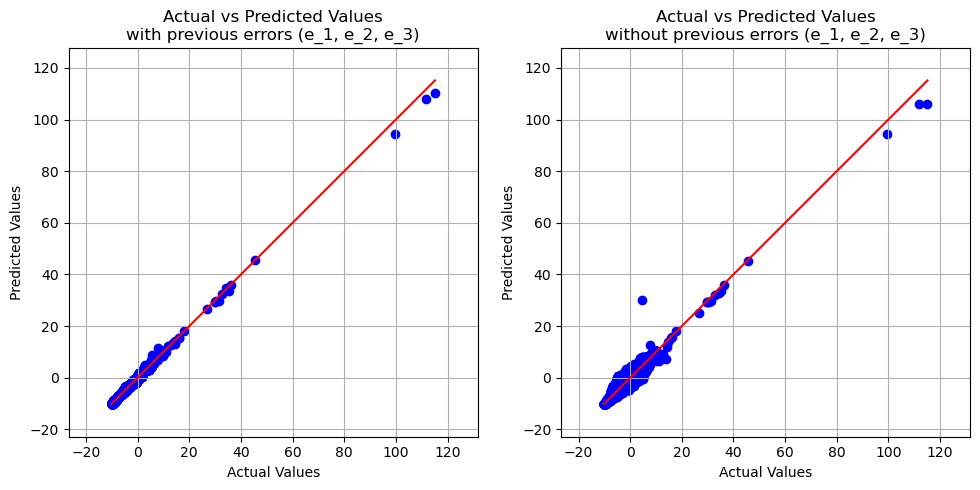

In [72]:
plot_predictions(y_test, y_pred_rf, y, y_pred_rf2)


### **6-C- SVR**

In [36]:
# building svm model

from sklearn.svm import SVR

Start_Time = time.time()
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train, y_train)
Time = time.time() - Start_Time
time_Per['time'][2] = Time

Start_Time = time.time()
model_svm2 = SVR(kernel='rbf')
model_svm2.fit(X, Y)
Time = time.time() - Start_Time
time_noPer['time'][2] = Time



SVR()

In [37]:
y_pred_svm = model_svm.predict(X_test)
score_svm = model_svm.score(X_test, y_test)

y_pred_svm2 = model_svm2.predict(x)
score_svm2 = model_svm2.score(x, y)

print('score:', score_svm)
print('mean squared error:', mean_squared_error(y_test, y_pred_svm))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_svm))
print('r2 score:', r2_score(y_test, y_pred_svm))

print('Second model')
print('score:', score_svm2)
print('mean squared error:', mean_squared_error(y, y_pred_svm2))
print('mean absolute error:', mean_absolute_error(y, y_pred_svm2))
print('r2 score:', r2_score(y, y_pred_svm2))


score: 0.936666756990762
mean squared error: 1.0873112856180984
mean absolute error: 0.07862401191221259
r2 score: 0.936666756990762
Second model
score: 0.8237689284125173
mean squared error: 3.0255522046406327
mean absolute error: 0.7800504919398663
r2 score: 0.8237689284125173


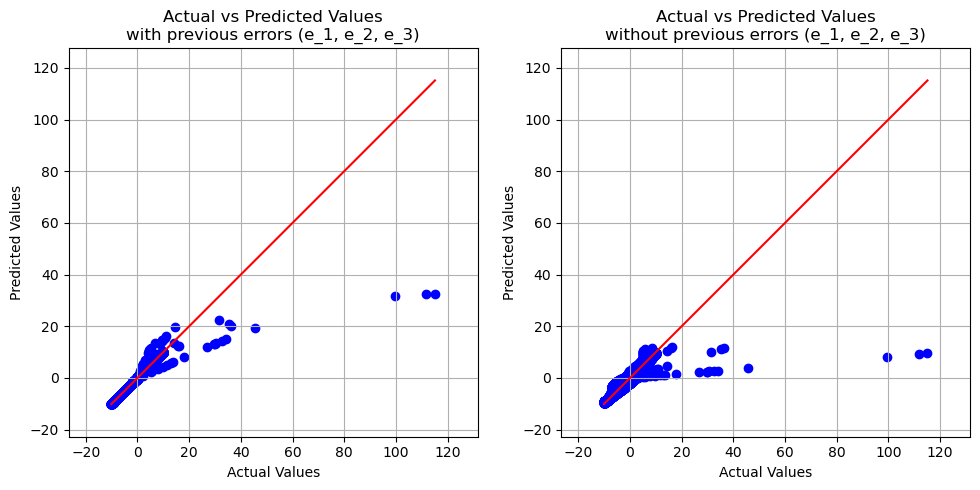

In [73]:
# plotting the results
plot_predictions(y_test, y_pred_svm, y, y_pred_svm2)

### **6-D- XGBRegressor**

In [39]:
# building XGBoost model
from xgboost import XGBRegressor

Start_Time = time.time()
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
Time = time.time() - Start_Time
time_Per['time'][3] = Time

Start_Time = time.time()
model_xgb2 = XGBRegressor()
model_xgb2.fit(X, Y)
Time = time.time() - Start_Time
time_noPer['time'][3] = Time


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
y_pred_xgb = model_xgb.predict(X_test)
score_xgb = model_xgb.score(X_test, y_test)

y_pred_xgb2 = model_xgb2.predict(x)
score_xgb2 = model_xgb2.score(x, y)

print('score:', score_xgb)
print('mean squared error:', mean_squared_error(y_test, y_pred_xgb))
print('mean absolute error:', mean_absolute_error(y_test, y_pred_xgb))
print('r2 score:', r2_score(y_test, y_pred_xgb))

print('Second model')
print('score:', score_xgb2)
print('mean squared error:', mean_squared_error(y, y_pred_xgb2))
print('mean absolute error:', mean_absolute_error(y, y_pred_xgb2))
print('r2 score:', r2_score(y, y_pred_xgb2))


score: 0.9954494278557404
mean squared error: 0.0781246658686201
mean absolute error: 0.17781984613125726
r2 score: 0.9954494278557404
Second model
score: 0.9484008637488276
mean squared error: 0.8858589977124992
mean absolute error: 0.6859035081546062
r2 score: 0.9484008637488276


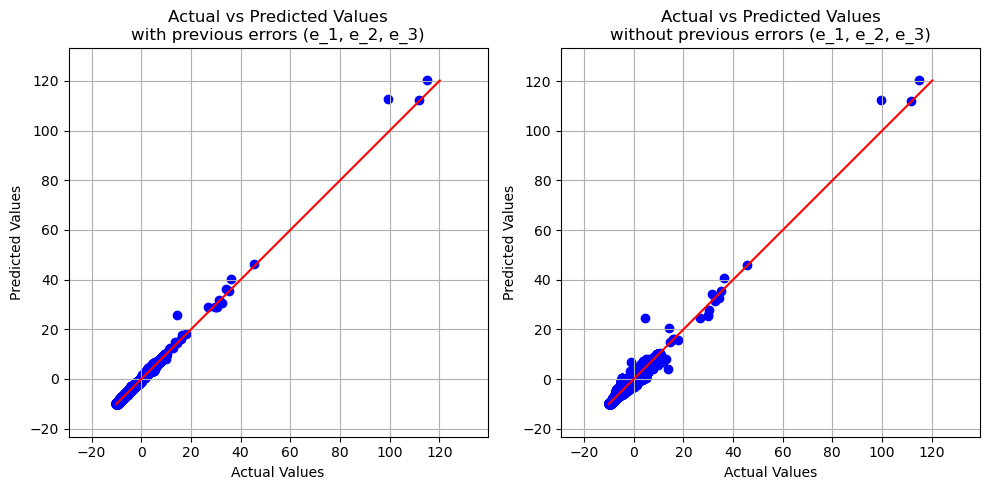

In [76]:
# plotting the results
plot_predictions(y_test, y_pred_xgb, y, y_pred_xgb2)

In [79]:
model_performance_Per = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'r2_score': [score, score_rf, score_svm, score_xgb],
    'mse': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_svm), mean_squared_error(y_test, y_pred_xgb)],
    'mae': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_svm), mean_absolute_error(y_test, y_pred_xgb)]
})

model_performance_noPer = pd.DataFrame({
    'model_name': ['Linear Regression', 'Random Forest', 'SVM', 'XGBoost'],
    'r2_score': [score2, score_rf2, score_svm2, score_xgb2],
    'mse': [mean_squared_error(y, y_pred2), mean_squared_error(y, y_pred_rf2), mean_squared_error(y, y_pred_svm2), mean_squared_error(y, y_pred_xgb2)],
    'mae': [mean_absolute_error(y, y_pred2), mean_absolute_error(y, y_pred_rf2), mean_absolute_error(y, y_pred_svm2), mean_absolute_error(y, y_pred_xgb2)]
})


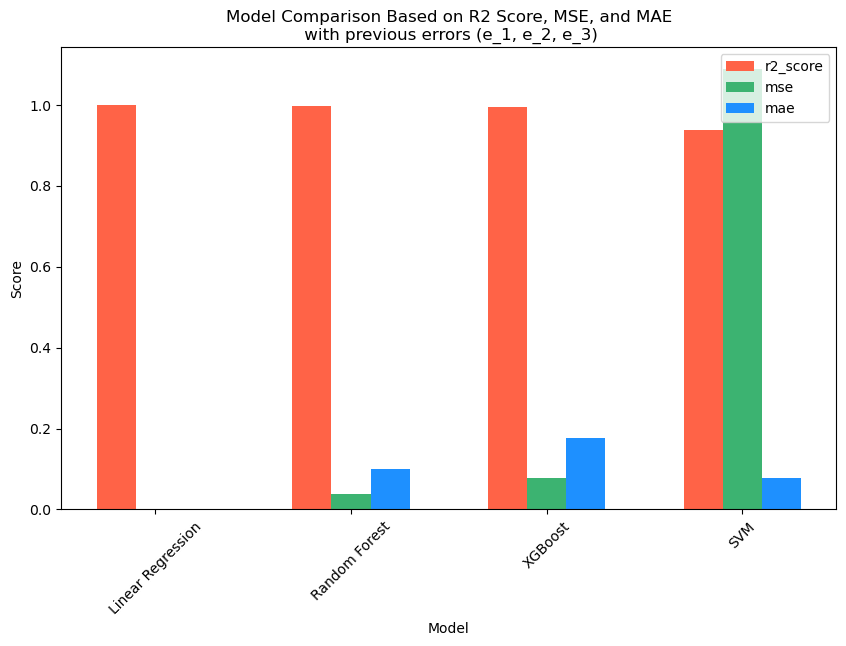

In [59]:
# Model Comparison Based on R2 Score, MSE, and MAE with previous errors (e_1, e_2, e_3)
model_performance_Per.sort_values('r2_score', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(model_performance_Per['model_name']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
plt.bar(r1, model_performance_Per['r2_score'], color='tomato', width=width, label='r2_score')
plt.bar(r2, model_performance_Per['mse'], color='mediumseagreen', width=width, label='mse')
plt.bar(r3, model_performance_Per['mae'], color='dodgerblue', width=width, label='mae')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score, MSE, and MAE\n with previous errors (e_1, e_2, e_3)')

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(model_performance_Per['model_name']))], model_performance_Per['model_name'], rotation=45)

plt.legend()
plt.show()

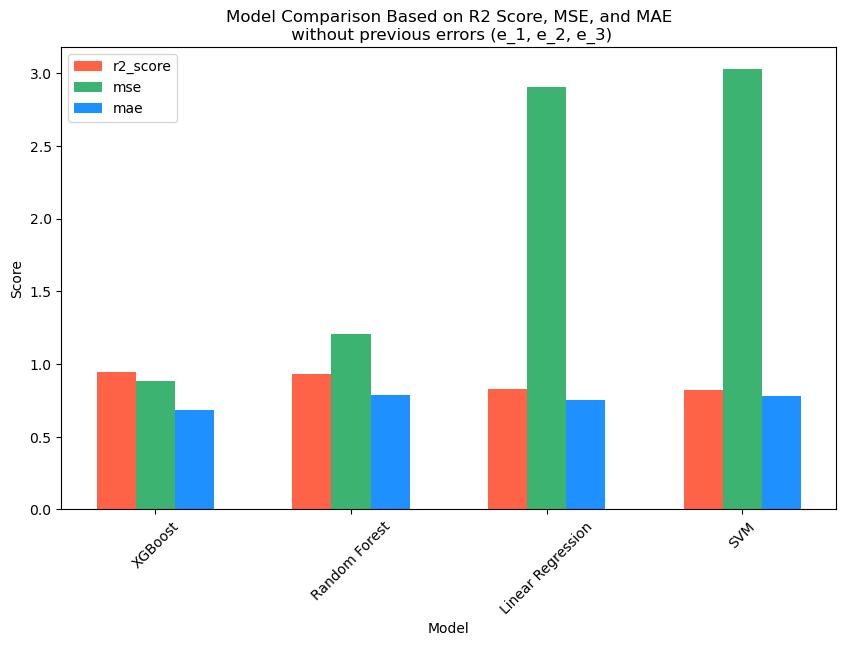

In [58]:
# Model Comparison Based on R2 Score, MSE, and MAE without previous errors (e_1, e_2, e_3)
model_performance_noPer.sort_values('r2_score', ascending=False, inplace=True)

# Define the width of the bars
width = 0.2

# Create an array with the positions of the bars on the x axis
r1 = np.arange(len(model_performance_noPer['model_name']))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(10, 6))

# Plot each bar at its respective position with new colors
plt.bar(r1, model_performance_noPer['r2_score'], color='tomato', width=width, label='r2_score')
plt.bar(r2, model_performance_noPer['mse'], color='mediumseagreen', width=width, label='mse')
plt.bar(r3, model_performance_noPer['mae'], color='dodgerblue', width=width, label='mae')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Based on R2 Score, MSE, and MAE\n without previous errors (e_1, e_2, e_3)')

# Add the model names as x-ticks in the middle of the grouped bars
plt.xticks([r + width for r in range(len(model_performance_noPer['model_name']))], model_performance_noPer['model_name'], rotation=45)

plt.legend()
plt.show()

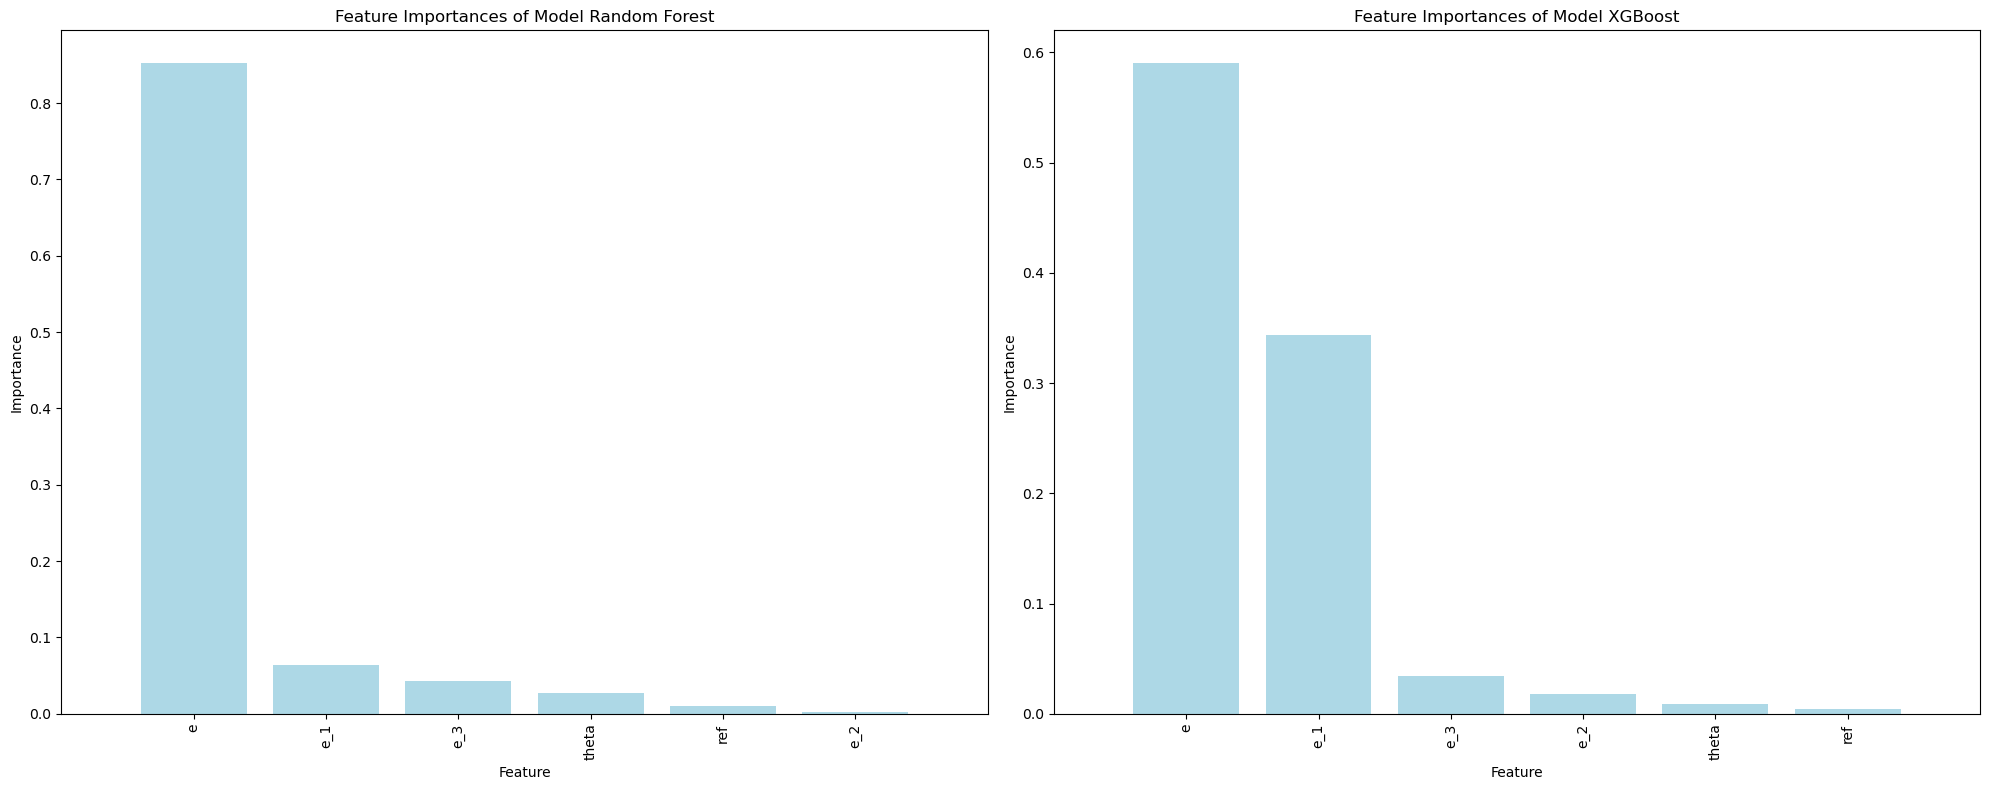

In [67]:
# Feature Importances
def plot_feature_importances(models, feature_names, models_names):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

    for i, model in enumerate(models):
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]

        # Rearrange feature names so they match the sorted feature importances
        sorted_feature_names = [feature_names[i] for i in indices]

        axs[i].bar(range(len(indices)), feature_importances[indices], color='lightblue', align='center')
        axs[i].set_xticks(range(len(indices)))
        axs[i].set_xticklabels(sorted_feature_names, rotation=90)
        axs[i].set_xlim([-1, len(indices)])
        axs[i].set_xlabel('Feature')
        axs[i].set_ylabel('Importance')
        axs[i].set_title('Feature Importances of Model ' + str(models_names[i]))

    plt.tight_layout()
    plt.show()


models = [model_rf, model_xgb]
models_names = ['Random Forest', 'XGBoost']
plot_feature_importances(models, df.columns, models_names)

